In [1]:
%load_ext autoreload
%autoreload 2

from synchronization import analysis
from synchronization import plots
from synchronization import runner

/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models
/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/plots_out


# Spike Time Variability

No synaptic connections, only background noise as input drive.

Want to find the optimal noise settings so that we model authentic fluctuations in the membrane potential produced by background chatter observed in the cortex.

Ideally every neuron gets its unique noise signal. We should be able to control the degree of correlation or dependence between these signals.
So we can create noise for every neuron that is correlated but differs slightly, making it unique for each neuron.

Questions to answer:

* Is the stochastic variable that Brian2 offers sufficient alone? 
* And how can we control the degree of correlation between a large set of signals?
* Create a base population level noise signal and then add for each neuron noise on top of it?

Spike Time Variability in a large EI network that produces gamma activity through PING mechanism could occur under the following conditions:

* Each neuron must get a unique but possibly correlated stochastic noise signal, this ensures that spikes or spike-pauses can occur that are not effect of the interaction between the neurons.
* The network must be large enough so that a small set of neuron can drop out of a cycle without destroying the PING rhythm
* Inhibition of I group onto E and I group must be low enough to allow at least some spikes in the E group during the inhibitory decay time. Otherwise inhibition will kill all activity during this time period.
* ?


In [2]:
plots.FIG_SIZE = (7, 5)

In [3]:
params = {
 "J_itoi": 0.0,
 "J_etoe": 0.0,
 "J_etoi": 0.0,
 "J_itoe": 0.0,
 "N_pop": 1.0,
 "N_e": 20,
 "N_i": 20,
 "K_etoe": 0,
 "K_etoi": 0,
 "K_itoi": 0,
 "K_itoe": 0
}

In [4]:
params['ou_mu'] = {
    'ou_mean': 3.0,
    'ou_sigma': 0.0,
    'ou_tau': 1.0
}

params['ou_sigma'] = {
    'ou_X0': 0.,
    'ou_mean': 0.0,
    'ou_sigma': 0.0,
    'ou_tau': 1.
}

model = runner.run(modified_params=params, file_name="spike_time_var")

Initializing net ...
Initialization time: 17.493919849395752s
==== Running Network ... ====
WARNING    Note that the synaptic pathway 'synapses_1_pre' will run on the clock of the group 'neurongroup' using a dt of 5e-05. Either the Synapses object 'synapses_1' or the target 'neurongroup_1' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 5e-05. If in doubt, try to ensure that 'neurongroup', 'synapses_1', and 'neurongroup_1' use the same dt. [brian2.synapses.synapses.synapses_dt_mismatch]
WARNING    Note that the synaptic pathway 'synapses_2_pre' will run on the clock of the group 'neurongroup_1' using a dt of 5e-05. Either the Synapses object 'synapses_2' or the target 'neurongroup' (or both) are using a different dt. This might lead to unexpected results. In particular, all delays will be rounded to multiples of 5e-05. If in doubt, try to ensure that 'neurongroup_1', 'synapses_2', and 'neurongroup' use

In [5]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("spike_time_var")


(<Figure size 504x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x139d06f10>)

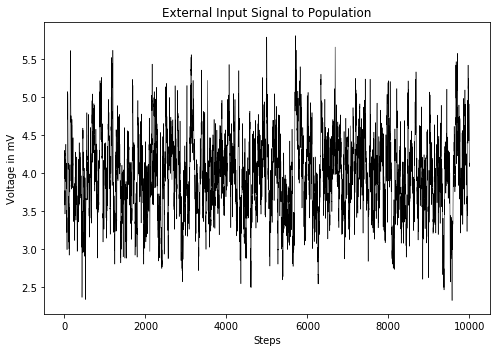

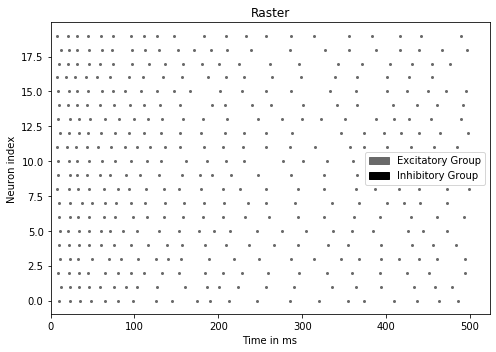

In [6]:
plots.ou_noise_by_params(model=model)
plots.raster(model=model, x_left=0, x_right=None)

In [7]:
# plots.raster(model=model)
# plots.lfp(model=model)
# plots.population_rates(model)
# plots.psd("PSD", model)

In [8]:
params['ou_mu'] = {
    'ou_mean': 0.0,
    'ou_sigma': 0.0,
    'ou_tau': 1.0
}

params['ou_sigma'] = {
    'ou_X0': 0.,
    'ou_mean': 1.0,
    'ou_sigma': 2.0,
    'ou_tau': 1.
}

model = runner.run(modified_params=params, file_name="spike_time_var")

Initializing net ...
Initialization time: 0.1370258331298828s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 1s
==== Network Run Finished ====
runtime: 1.6


(<Figure size 504x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13a0e3c10>)

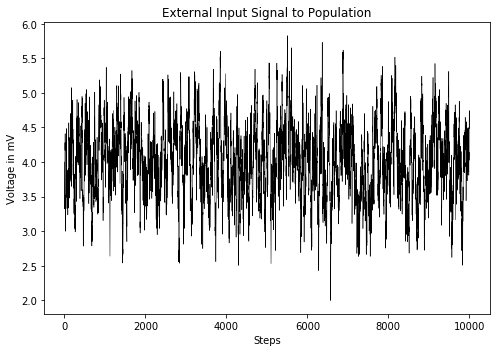

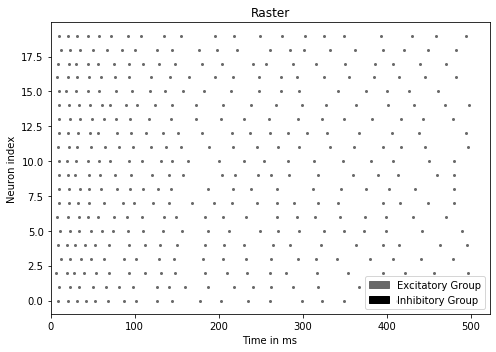

In [9]:
plots.ou_noise_by_params(model=model)
plots.raster(model=model, x_left=0, x_right=None)